# Analizador de Sentimientos
Por: Diana Aucancela y Alexander Siavichay
## Introducción
A continuación se presenta el código necesario para realizar un analizador de sentimientos.
Procedimiento:
- Obtención de los datos desde la Web para el entrenamiento
- Tratamiento de los datos
- Modelado de la Red Neuronal con CNN
- Entrenamiento
- Análisis de Resultados

## Paquetes instalados
- conda install -c anaconda beautifulsoup4
- conda install -c anaconda requests
- conda install -c anaconda scikit-learn
- conda install -c conda-forge keras
- 

## Obtención de los datos desde la Web para el entrenamiento
Para poder reconocer los sentimientos de una persona mediante el texto que ha escrito, necesitamos dar a conocer a nuestro modelo de Red que textos son aquellos que expresan sentimientos como: alegría, tristeza, ira.

En una empresa que disponga de una página web, redes sociales, puede analizar estos textos para conocer la opinión de sus clientes, pero no solo conocer de manera particular, si no, llegar a obtener datos globales que le permitan tomar decisiones. Por ejemplo un gráfico estadístico de los sentimientos especificados anteriormente podrían ser un punto de partida para un administrador.

El siguiente código realizar una obtención de datos de páginas web que contienen mensajes específicos y serán almacenados y etiquetados en un archivo de texto.

In [1]:
import pandas as pd

columnas = ['id','description','description']
data_pure = pd.read_csv('dataset/formateado_sentimientos_utf8.csv', delimiter=";",encoding = "latin-1",usecols=['id', 'description', 'sentiment','target'])
data=data_pure
# nos quedamos con una selección de 20.000 tweets aleatorios
data = data.sample(n=20000, random_state=42)
data = data.reset_index(drop=True) # reconstruimos los índices para que sean consecutivos
data.head(100)

,id,description,sentiment,target
0,9806,Les comparto un gran video de la BBC donde se ...,tristeza,1
1,19352,Segundo episodio de ??Nada les calza? luego...,tristeza,1
2,13450,#ùNOMBRE?,alegria,0
3,14802,A veces me pierdo..un padre me contó que disc...,alegria,0
4,17349,@sleepychimmy Otra sorpresa mís para este gran...,alegria,0
...,...,...,...,...
95,19331,Joven recibió un botellazo en un intento de a...,ira,2
96,1289,Desde Laguna de Duero recibo la visita de esta...,alegria,0
97,2911,Tuve que llamar a la lánea de Claro y me atend...,tristeza,1
98,12702,@DeniseMaerker @Faitelson_ESPN @AtandoCabos Ad...,tristeza,1


## Métodos con spacy para lemantizar todo el corpus

In [3]:
import spacy
from spacy import displacy
from spacy.lang.es.stop_words import STOP_WORDS

In [4]:
'''
Lemmatizing example for a verb, noun.
'''
#Se necesita instalar python -m spacy download es_core_news_sm para trabajar con dataset en español
nlp = spacy.load('es_core_news_sm')
def construir_corpus(doc):
    doc=nlp(doc)
    corpus=[]
    texto='';
    i=0
    for token in doc:
        if not token.is_stop and  token.is_alpha and len(token.lemma_)>3:
            texto += ' '+token.lemma_
    return texto
'''
Codificación del corpus a una matriz numérica
'''

'\nCodificación del corpus a una matriz numérica\n'

In [6]:
tweets=data['description']
print (tweets)
tweets=tweets.map(construir_corpus)
print (tweets)
#corpus=tweets.map(construir_corpus)

0        Les comparto un gran video de la BBC donde se ...
1        Segundo episodio de ??Nada les calza? luego...
2                                                #ùNOMBRE?
3        A veces me pierdo..un padre me contó que disc...
4        @sleepychimmy Otra sorpresa mís para este gran...
                               ...                        
19995    Cuba: Maestra agrede a alumno por su fe cristi...
19996    Tirando paso como un dominicano mís, alegre y ...
19997    ? Día musical y divertido en MasterchEFugr Ñ...
19998    Esta noche no te puedes perder el inicio TOUR ...
19999    @sxckpsd ??Parecía haber ôùMolestado? ôùEntri...
Name: description, Length: 20000, dtype: object
0         compartir video íguilas real combatir preso z...
1         episodio discursar Cruyff técnico discursar p...
2                                                  ùNOMBRE
3         perder padre discutir hijo decir Cuíl hacer d...
4                               sorpresa festivo felicidad
        

In [7]:
data['description']=tweets

## Gráfica de los datos

(array([3994., 3998., 3998., 4009., 4001.]),
 array([1.00000e+00, 4.06660e+03, 8.13220e+03, 1.21978e+04, 1.62634e+04,
        2.03290e+04]),
 <a list of 5 Patch objects>)

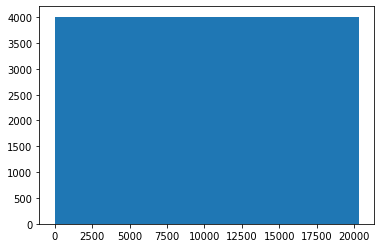

In [8]:
from matplotlib import pyplot as plt

plt.hist(data['id'], bins=5)

(array([6333., 7255., 6412.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <a list of 3 Patch objects>)

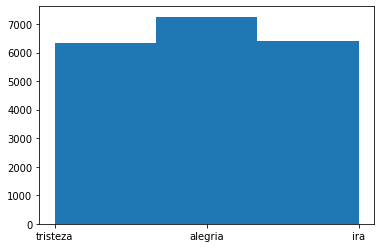

In [9]:
# ahora la etiqueta para los tweets positivos es el 1
data.loc[data['sentiment'] == 4, 'sentiment'] = 1
plt.hist(data['sentiment'], bins=3)

In [10]:
from keras.preprocessing.text import Tokenizer

# codificar tweets -> corpus -> one-hot
# con limit podemos limitar el número de palabras del corpus
def construir_corpus(tweets, limit=3000):
    corpus=[]
    i=0
    for t in tweets:
        if i>limit:
            break
        for w in t.lower().split():
            # si la palabra no está en el corpus y no empieza por @ (usuario twitter)
            if w[0] not in ('@') and 'http' not in w and len(w)>3 and not w in corpus:
                corpus.append(w)
                i=i+1
    
    # codificar palabras como enteros
    t = Tokenizer()
    t.fit_on_texts(corpus)
    encoded_corpus = t.texts_to_matrix(corpus, mode='count')
    
    return corpus[:limit], encoded_corpus[:limit]

Using TensorFlow backend.


In [11]:
# Probamos con tres frases para confirmar que todo va bien
tweets = ['Sólo sé que no sé nada', 'Pienso luego existo', ' todo @socrates y @descartes']

corpus, encoded_corpus = construir_corpus(tweets)
print (corpus)
print (encoded_corpus)

['sólo', 'nada', 'pienso', 'luego', 'existo', 'todo']
[[0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


In [12]:
# Ahora usamos los tweets del dataset
tweets = data['description']
corpus, encoded_corpus = construir_corpus(tweets)
print (corpus)
print (encoded_corpus) # esto no lo vamos a necesitar para nuestro ejemplo

['compartir', 'video', 'íguilas', 'real', 'combatir', 'preso', 'zorro', 'abatir', 'considerar', 'totémico', 'dios', 'solar', 'tutelar', 'mexica', 'huitzilopochtli', 'nahua', 'volar', 'episodio', 'discursar', 'cruyff', 'técnico', 'positivo', 'seriar', 'ganador', 'vender', 'humo', 'puro', 'palabra', 'predecible', 'bolillo', 'pesimista', 'negativo', 'calza', 'ùnombre', 'perder', 'padre', 'discutir', 'hijo', 'decir', 'cuíl', 'hacer', 'dudar', 'problema', 'quedaron', 'mudo', 'sorpresa', 'festivo', 'felicidad', 'salir', 'encerrar', 'creer', 'cáncer', 'vida', 'estúpido', 'olvidarse', 'calmarte', 'tenia', 'atacar', 'llanto', 'miedo', 'angustiar', 'enojar', 'prestar', 'hombro', 'besar', 'abrazar', 'refugiar', 'aforar', 'tormenta', 'joven', 'rubio', 'acabar', 'notar', 'extraño', 'mujer', 'curioso', 'verla', 'agradable', 'gustar', 'conocerla', 'ôùseñorita', 'apenar', 'hablarle', 'amigo', 'querer', 'pasar', 'volver', 'hablar', 'cambiar', 'enojarse', 'madre', 'diciéndome', 'deberia', 'estudiar', 'e

In [13]:
# echo 1 > /proc/sys/vm/overcommit_memory

import numpy as np

from keras.utils import to_categorical

def codifica_tweets(tweets, corpus, corpus_size=5000):
    coded = np.zeros((len(tweets), corpus_size))
    for i, tweet_text in enumerate(tweets):
        words = tweet_text.lower().split()
        for w in words:
            if w in corpus:
                coded[i,corpus.index(w)] = 1

    return coded

x_train = codifica_tweets(data['description'], corpus)
y_train = to_categorical(data['target'])
print (len(data['description']))
print(x_train.shape[0])
print(x_train.shape[1])
print (x_train)

20000
20000
5000
[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
print(len(corpus))
print(len(data['description']))
print(data['description'][0])
print(data['sentiment'][0])
print(data['target'][0])

3000
20000
 compartir video íguilas real combatir preso zorro abatir considerar totémico dios solar tutelar mexica Huitzilopochtli nahua considerar volar
tristeza
1


In [15]:
# barajamos el dataset
np.random.seed(42)    
permutation = np.random.permutation(x_train.shape[0])
x_train_p = x_train[permutation]
y_train_p = y_train[permutation]
     
# obtenemos el conjunto de validación
num_val = 5000
x_val = x_train_p[:num_val]
x_train = x_train_p[num_val:]
y_val = y_train_p[:num_val]
y_train = y_train_p[num_val:]

# obtenemos el conjunto de test
x_test = x_train_p[:num_val]
x_train = x_train_p[num_val:]
y_test = y_train_p[:num_val]
y_train = y_train_p[num_val:]

In [16]:
print(x_train_p.shape[0])

i = 1
while i < 10:
    i += 1  
    print (x_train[i])
    print (y_train[i])
    print (data.iloc[i,1:3])

20000
[0. 0. 0. ... 0. 0. 0.]
[0. 1. 0.]
description     ùNOMBRE
sentiment       alegria
Name: 2, dtype: object
[0. 0. 0. ... 0. 0. 0.]
[1. 0. 0.]
description     perder padre discutir hijo decir Cuíl hacer d...
sentiment                                                alegria
Name: 3, dtype: object
[0. 0. 0. ... 0. 0. 0.]
[0. 1. 0.]
description     sorpresa festivo felicidad
sentiment                          alegria
Name: 4, dtype: object
[0. 0. 0. ... 0. 0. 0.]
[1. 0. 0.]
description     salir encerrar creer salir cáncer vida estúpido
sentiment                                              tristeza
Name: 5, dtype: object
[0. 0. 0. ... 0. 0. 0.]
[1. 0. 0.]
description     olvidarse calmarte tenia atacar llanto miedo ...
sentiment                                                    ira
Name: 6, dtype: object
[0. 0. 0. ... 0. 0. 0.]
[1. 0. 0.]
description     joven rubio acabar notar extraño mujer curios...
sentiment                                               tristeza
Name: 7, dtype: o

In [44]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(5000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['acc'])

train_log = model.fit(x_train_p, y_train_p,
                     epochs=10, batch_size=512,
                     validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 120us/step - loss: 0.9189 - acc: 0.8051 - val_loss: 0.7018 - val_acc: 0.9334
Epoch 2/10
20000/20000 [==============================] - 2s 97us/step - loss: 0.5430 - acc: 0.9455 - val_loss: 0.3882 - val_acc: 0.9580
Epoch 3/10
20000/20000 [==============================] - 2s 97us/step - loss: 0.2969 - acc: 0.9622 - val_loss: 0.2106 - val_acc: 0.9678
Epoch 4/10
20000/20000 [==============================] - 2s 96us/step - loss: 0.1639 - acc: 0.9693 - val_loss: 0.1195 - val_acc: 0.9744
Epoch 5/10
20000/20000 [==============================] - 2s 97us/step - loss: 0.0993 - acc: 0.9735 - val_loss: 0.0783 - val_acc: 0.9772
Epoch 6/10
20000/20000 [==============================] - 2s 102us/step - loss: 0.0706 - acc: 0.9769 - val_loss: 0.0596 - val_acc: 0.9798
Epoch 7/10
20000/20000 [==============================] - 2s 98us/step - loss: 0.0565 - acc: 0.9800 - val_loss: 0.0501 - val_ac

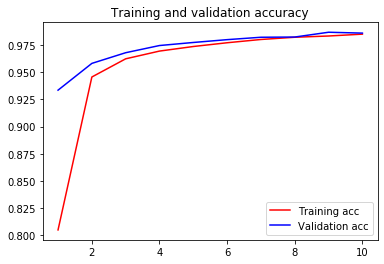

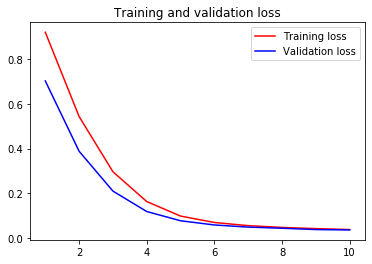

In [45]:
import matplotlib.pyplot as plt

acc = train_log.history['acc']
val_acc = train_log.history['val_acc']
loss = train_log.history['loss']
val_loss = train_log.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [46]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(test_accuracy)

5000/5000 [==============================] - 1s 105us/step
0.98580002784729


In [47]:
predictions = model.predict(x_test)

i = 100
while i < 500:
    i += 30    
    print (np.argmax(predictions[i]))# clase más probable
    print (y_test[1])

2
[0. 1. 0.]
0
[0. 1. 0.]
0
[0. 1. 0.]
1
[0. 1. 0.]
2
[0. 1. 0.]
1
[0. 1. 0.]
1
[0. 1. 0.]
0
[0. 1. 0.]
1
[0. 1. 0.]
1
[0. 1. 0.]
2
[0. 1. 0.]
1
[0. 1. 0.]
1
[0. 1. 0.]
0
[0. 1. 0.]


# Referencias

[1] Construcción de un corpus marcadocon emociones para el análisis desentimientos en Twitter en español https://pdfs.semanticscholar.org/caf9/fc60efdd22df6919d56939e6640e8661ebc9.pdf
[2] An´alisis de contenidos en Twitter: clasificaci´on de mensajes e identificación de la tendencia pol´ıtica de los usuarios, David Vilares Calvo